<h1>Practica 7 Data clustering / Agrupamiento de datos</h1>

<p>  Objetivo:
 <li> Usar KMeans para agrupar datos similares automáticamente sin usar etiquetas.</li>  
 <li>Visualizar los clústeres encontrados.</li> 
</p>

<h3>Introducción a Clustering y Clusters</h3>
<p>¿Qué es un cluster? 
<li>Cluster significa grupo o conjunto.</li>
<li>En ciencia de datos, un cluster es un grupo de puntos de datos que se parecen entre sí de alguna forma (según sus características).
</li>

Ejemplo:
Si tienes personas y las agrupas por altura y peso, es probable que personas bajitas y ligeras estén juntas en un grupo, y personas altas y pesadas en otro.</p>

<p>¿Qué es clustering?
<li>Clustering es el proceso de agrupar datos automáticamente sin saber antes a qué grupo pertenecen.</li>
<li>Es un tipo de aprendizaje automático llamado "no supervisado".</li>

No supervisado significa que no tienes etiquetas (por ejemplo, no sabes si un día es "frío" o "caluroso"), y el algoritmo descubre patrones por sí solo.</p>

<h3>Instalo e importo librerias necesarias</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('csv/hour_cleaned.csv')
df.head()


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h3>Selecciono las columnas numericas que tengan sentido para agrupar</h3>

<p>Las columnas que me hacen mas sentido agrupar son:</p>
<li>Temperatura (temp)</li>

<li>Humedad (hum)</li>

<li>Velocidad del viento (windspeed)</li>

<li>Cantidad de usuarios registrados (registered)</li>

<li>Cantidad de usuarios casuales (casual)</li>

In [6]:
features = ['temp', 'hum', 'windspeed', 'registered', 'casual']
X = df[features]

<h3>Estandarizar los datos (muy importante en clustering)</h3>
<p>¿Por qué? → Porque K-Means depende de distancias, y si no escalas los datos, una variable puede dominar a las otras.</p>

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<h3>Aplicar KMeans</h3>
<p>Primero probamos con k = 2 clústeres como ejemplo sencillo:</p>

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Agregar la etiqueta de cluster al DataFrame
df['cluster'] = kmeans.labels_


<h3>Visualizar los clusters</h3>
<p>Podemos ver 2 variables en un scatter plot de colores:</p>


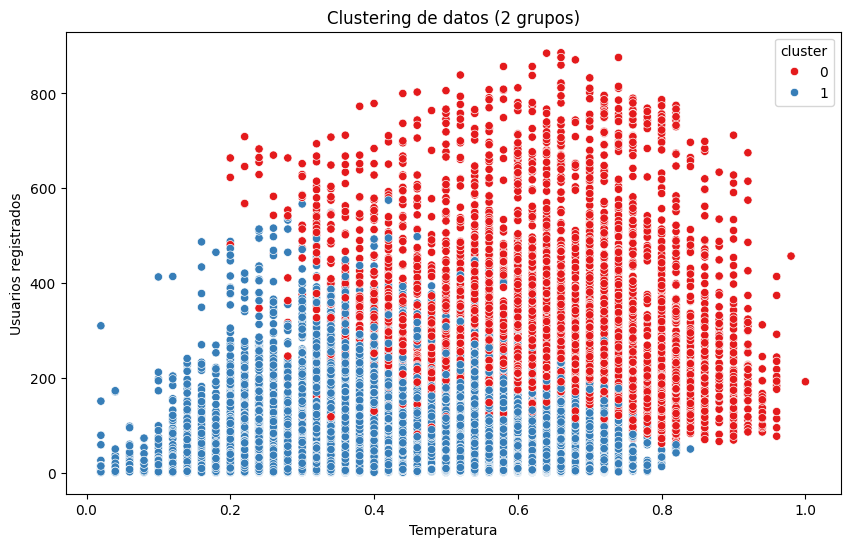

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['temp'], y=df['registered'], hue=df['cluster'], palette='Set1')
plt.title('Clustering de datos (2 grupos)')
plt.xlabel('Temperatura')
plt.ylabel('Usuarios registrados')
plt.show()


Pasos que se siguieron: 
| Paso | Acción |
|:-----|:------|
| 1 | Cargar datos |
| 2 | Elegir columnas numéricas |
| 3 | Escalar datos |
| 4 | Aplicar KMeans |
| 5 | Agregar la etiqueta de clúster |
| 6 | Graficar los resultados |